# Language Identification Introduction

Language identification is an important step in a Natural Language Processing (NLP). It involves predicting the natural language of any text provided. It is quite important to identify the language of the provided text before performing any other actions like translating it. For exampler, if one uses google translate, the text input box suggests ‘Detect Language’. This is so because Google initially tries to identify the language of the text supplied before it can be translated.

# Dataset

The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.

The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data. The full dataset consists of 6,872,356 sentences in 11  languages ;Afrikaans,Sesotho sa Leboa,Sesotho,Setswana,Siswati,Tshivenda,English,IsiNdebele,IsiXhosa and Isizulu.

This dataset contains sentences from South africa's 11 official languages.In this task we create an NLP model which will be able to take the provided sentences and predict the natural language of those particular sentenses.

# 1.Importing the libraries and reading the dataset


In [73]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")


from sklearn.model_selection import train_test_split

 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Creating the data frame from the language dataset provided

In [74]:
def read_file(path):
    '''This function reads the csv file given and displays the first five rows'''
    data = pd.read_csv(path)

    return data

In [75]:
#reading the train set 
train_df = read_file('data/train_set.csv')

#reading the test set
test_df = read_file('data/test_set.csv')


# 2 Exploratory Data Analysis

In [76]:
#displaying the first rows
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [77]:
test_df["index"].value_counts()

1       1
3818    1
3794    1
3793    1
3792    1
       ..
1893    1
1892    1
1891    1
1890    1
5682    1
Name: index, Length: 5682, dtype: int64

Establishing the distinct number of langusges and the total number of sentenses in the dataset.

In [78]:
train_df["lang_id"].value_counts() # There are 11 languages and 3000 sentenses in each category

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [79]:
# Verifying the data types and establishing if there are null values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [80]:
# Establishing if the semntenses have stop words
train_df['text'][0:5]

0    umgaqo-siseko wenza amalungiselelo kumaziko ax...
1    i-dha iya kuba nobulumko bokubeka umsebenzi na...
2    the province of kwazulu-natal department of tr...
3    o netefatša gore o ba file dilo ka moka tše le...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
Name: text, dtype: object

#### **Analysis of the language distribution in the dataset and pie chart**

8.0
8.0


<AxesSubplot:ylabel='lang_id'>

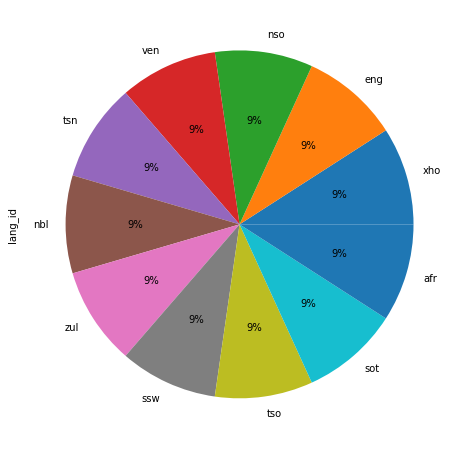

In [81]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 8
plt.rcParams["figure.figsize"] = plot_size 

#  distribution of sentenses from the dataset
train_df.lang_id.value_counts().plot(kind='pie', autopct='%1.0f%%')


Our dataset is balanced accross the different categories.Class imbalance should always be dealt with to ensure we dont get a biased model and this is carried out during feature engineering.

# 3. Feature Engineering

### Classifying the independent and dependent variables


In [82]:
X = train_df["text"] #text data is the independent variable of the training set
y = train_df["lang_id"] #lang_id is the dependent variable of the training set
X_t = test_df['text'] #text data is the independent variable of the test set

### Text Preprocessing
Cleaning our dataset to remove symbols that will determine the quality of our model. 

In [83]:
# creating a list for appending the preprocessed text
datafm_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        datafm_list.append(text)

In [84]:
# creating a list for appending the preprocessed text in the text data set
datafm_list1 = []
# iterating through all the text
for text in X_t:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        datafm_list1.append(text)

### Bag of Words

Our model should take in numerical data.Using CountVectorizer to convert our dataset from text to numerical form.

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)

In [86]:
#look at the shape
X.shape 

(33000, 141958)

We use transform on the test dataset because we have used the scaled paramaters learned from the train data to scale the test data

In [87]:
# The test data is transformed using transform()
X_t = cv.transform(X_t)
X_t.shape

(5682, 141958)

### Train Test Splitting

Creating the training set, for training the model

In [88]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

# 4. Model Training and Prediction


In this part we train our model uisng different models from the training set and later predict the output for the test set. using the classification report.

### NAIVE_BAYES algorithm 



In [89]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

#fitting the Naive_Bayes model
model.fit(x_train, y_train)

#predicting the y labels
y_pred1 = model.predict(x_test)

#metrics reporting
acc = accuracy_score(y_test, y_pred1)

report = classification_report(y_test,y_pred1)

print("Accuracy is :",acc)
#print("Matrix is :",cm)
print("Report is :",report)

Accuracy is : 0.9990909090909091
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       0.99      1.00      1.00       574
         nbl       1.00      1.00      1.00       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      1.00      1.00       621
         zul       1.00      1.00      1.00       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### Random Forest  

In [90]:
rf_clf = RandomForestClassifier(n_estimators=100) # Create Random Forest classifer object
rf_clf.fit(x_train,y_train) # Fit/Train Random Forest Classifer on training set

#predict y labels
y_pred5 = rf_clf.predict(x_test)

#metrics report
acc = accuracy_score(y_test, y_pred5)

report = classification_report(y_test,y_pred5)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9883333333333333
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       0.99      1.00      0.99       574
         nbl       0.98      0.96      0.97       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       1.00      0.97      0.98       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       0.98      0.98      0.98       621
         zul       0.94      0.97      0.96       634

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



### Logistics Regression

In [55]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)# Creating a logistics regression
#fit the train data
LRmodel.fit(x_train, y_train)
#predict y labels
y_pred2 = LRmodel.predict(x_test)

#metrics report
acc = accuracy_score(y_test, y_pred2)

report = classification_report(y_test,y_pred2)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9953030303030304
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       0.99      0.99      0.99       613
         nso       1.00      1.00      1.00       570
         sot       1.00      0.99      1.00       600
         ssw       0.99      1.00      0.99       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      0.99      0.99       621
         zul       0.98      0.98      0.98       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### BernoulliNB model

In [91]:

BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)
y_pred3 = BNBmodel.predict(x_test)

#metrics report
acc = accuracy_score(y_test, y_pred3)

report = classification_report(y_test,y_pred3)

print("Accuracy is :",ac)
print("Report is :",report)

Accuracy is : 0.9953030303030304
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       1.00      1.00      1.00       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      1.00      1.00       621
         zul       1.00      1.00      1.00       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### Support Vector Classifier

In [56]:
from sklearn.svm import SVC

svc = SVC( kernel='rbf')
svc.fit(x_train, y_train)
y_pred4 = svc.predict(x_test)

#metrics report
acc = accuracy_score(y_test, y_pred4)
report = classification_report(y_test,y_pred4)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9940909090909091
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       0.99      0.98      0.98       613
         nso       1.00      0.99      1.00       570
         sot       1.00      0.99      1.00       600
         ssw       0.99      1.00      1.00       624
         tsn       0.99      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       0.99      0.99      0.99       621
         zul       0.97      0.98      0.98       634

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



### Passive Aggresive Classifier



In [57]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
X = tfidf_vectorizer.fit_transform(train_df['text'])
X_t = tfidf_vectorizer.transform(test_df['text'])
Y = train_df.lang_id
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(X_train, Y_train)
pred = pass_tf.predict(X_test)


acc = accuracy_score(Y_test, pred)#metrics reporting
report = classification_report(Y_test,pred)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9975757575757576
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       632
         eng       1.00      1.00      1.00       605
         nbl       0.99      1.00      1.00       587
         nso       1.00      1.00      1.00       615
         sot       1.00      1.00      1.00       605
         ssw       1.00      1.00      1.00       591
         tsn       1.00      1.00      1.00       629
         tso       1.00      1.00      1.00       588
         ven       1.00      1.00      1.00       576
         xho       0.99      1.00      0.99       571
         zul       0.99      0.99      0.99       601

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# 5. Model Evaluation


We will go head to compare the model perfomance of the models defined above.

In [58]:
names = ['MultinomialNB', 'Random Forest',
         'LogisticRegression', 'BernoulliNB','SVC','PassiveAggressiveClassifier'
         ]

In [59]:
classifiers = [
    MultinomialNB(),
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1),
    BernoulliNB(),
    SVC(kernel='rbf'),
    PassiveAggressiveClassifier() 
    ]

In [60]:
from sklearn import metrics
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(x_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall    = metrics.recall_score(y_train, y_pred, average='weighted')

    f1        = metrics.f1_score(y_train, y_pred, average='weighted')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='weighted')

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting MultinomialNB model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting LogisticRegression model...
... predicting
... scoring
Fitting BernoulliNB model...
... predicting
... scoring
Fitting SVC model...
... predicting
... scoring
Fitting PassiveAggressiveClassifier model...
... predicting
... scoring
... All done!


Results

In [61]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Random Forest,1.000000,1.000000,1.000000,1.000000,0.988206,82.277285
LogisticRegression,1.000000,1.000000,1.000000,1.000000,0.995300,24.797965
PassiveAggressiveClassifier,1.000000,1.000000,1.000000,1.000000,0.996519,0.485780
BernoulliNB,0.999886,0.999887,0.999886,0.999886,0.999394,0.093862
MultinomialNB,0.999848,0.999849,0.999848,0.999849,0.999091,0.083741
SVC,0.999697,0.999697,0.999697,0.999697,0.994096,40.684793


Graph to compare the different metrics

<AxesSubplot:xlabel='Classifier'>

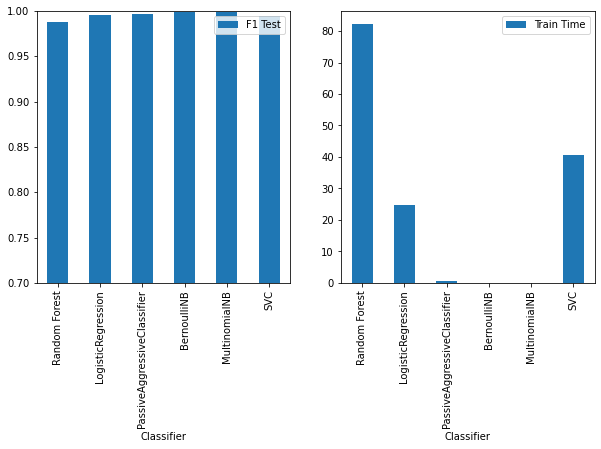

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.70,1.00])
results.plot(y='Train Time', kind='bar', ax=ax[1])

The random forest model took a long to fit the data and performed least. 
Multinormal Naive Bayes took the shorter time to fit data  
BernoulliNB  performed the best and took very little time.
To comprehend the performance of the BernoulliNB model we'll look at the confusion matricx and classification report results

In [63]:
confusion['BernoulliNB']

array([[2413,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 2426,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 2387,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 2430,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2400,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 2376,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 2419,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 2403,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 2401,    0,    0],
       [   0,    2,    0,    0,    0,    0,    0,    0,    0, 2377,    0],
       [   0,    1,    0,    0,    0,    0,    0,    0,    0,    0, 2365]],
      dtype=int64)

In [64]:
print(class_report['BernoulliNB'])

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00      2413
         eng       1.00      1.00      1.00      2426
         nbl       1.00      1.00      1.00      2387
         nso       1.00      1.00      1.00      2430
         sot       1.00      1.00      1.00      2400
         ssw       1.00      1.00      1.00      2376
         tsn       1.00      1.00      1.00      2419
         tso       1.00      1.00      1.00      2403
         ven       1.00      1.00      1.00      2401
         xho       1.00      1.00      1.00      2379
         zul       1.00      1.00      1.00      2366

    accuracy                           1.00     26400
   macro avg       1.00      1.00      1.00     26400
weighted avg       1.00      1.00      1.00     26400



The accuracy of the BernuolliNB model is the best at 0.9998 indicating our model is performing well. Ploting the confusion matrix using the seaborn heatmap to illustrate the same.

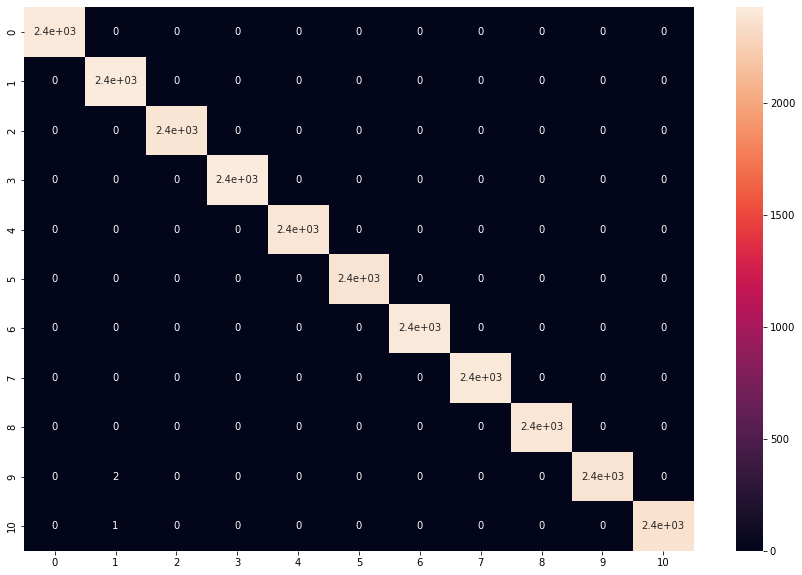

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion['BernoulliNB'], annot = True)
plt.show()

Analysis reveals that this model is almost accurate in its prediction.

# Predictions with the test dataset

In [92]:
X_t.shape

(5682, 141958)

In [93]:
text_pred= BNBmodel.predict(X_t)

In [96]:
#The following code is used to save the predictions for kaggle.

kaggle_bnb = test_df[['index']]
kaggle_bnb['lang_id']= text_pred
kaggle_bnb.to_csv('South_Africa_Language_Analysis.csv', index = None)

In [97]:
read_file('South_Africa_Language_Analysis.csv')

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot


Best models are built through iteration. We implement a quick way that should give us a good idea of how to proceed in finding a better model to this particular language classification. The quicker we can generate a couple of results, the quicker we can come up with new ideas of how to proceed.

# Conclusion
This is a basic Natural Language Processing(NLP) technique. We did analyze the data and preprocess it accordingly. A bag of words model was one way of representing our text data. Text extraction and vectorization are important steps for good predictions in NLP.BernoulliNB has proven to be a better model in language, hence more accurate results were produced.